In [1]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

The `Perceptron` is equivalent to a `SGDClassifier` with `loss="perceptron"`, no regularization, and a constant learning rate equal to 1:
  
When the Perceptron finds a decision boundary that properly separates the classes, it stops learning. This means that the decision boundary is often quite close to one class:

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron

# as_frame : If True, the data is a pandas DataFrame including columns with appropriate dtypes (numeric).
# The target is a pandas DataFrame or Series depending on the number of target columns. 
iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = iris.target == 0    # Iris setosa

per_clf = Perceptron(random_state=42)
per_clf.fit(X, y)

X_new = [[2, 0.5], [3, 1]]
y_pred = per_clf.predict(X_new)  # predicts True and False for these 2 flowers

y_pred

array([ True, False])

## Regression MLPs

In [3]:
from sklearn.datasets import fetch_california_housing
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

mlp_reg = MLPRegressor(hidden_layer_sizes=[50, 50, 50], random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_reg)
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid, y_pred, squared=False)

rmse

0.5053326657968451

## Classification MLPs

In [4]:
# extra code – this was left as an exercise for the reader

from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier

iris = load_iris()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    iris.data, iris.target, test_size=0.1, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, test_size=0.1, random_state=42)

mlp_clf = MLPClassifier(hidden_layer_sizes=[5], max_iter=10_000,
                        random_state=42)
pipeline = make_pipeline(StandardScaler(), mlp_clf)
pipeline.fit(X_train, y_train)
accuracy = pipeline.score(X_valid, y_valid)
accuracy

1.0

# Implementing MLPs with Keras
## Building an Image Classifier Using the Sequential API


In [5]:
import tensorflow as tf

fashion_minst = tf.keras.datasets.fashion_mnist.load_data()
(X_train_full, y_train_full), (X_test, y_test) = fashion_minst
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

print(X_train.dtype)
print(X_train.shape)

# scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255:
X_train, X_valid, X_test = X_train / 255., X_valid / 255., X_test / 255. 

uint8
(55000, 28, 28)


### Creating the model using the Sequential API

In [6]:
# tf.random.set_seed(42)
# model = tf.keras.Sequential()
# model.add(tf.keras.layers.InputLayer(input_shape=[28, 28]))
# model.add(tf.keras.layers.Flatten())
# model.add(tf.keras.layers.Dense(300, activation='relu'))
# model.add(tf.keras.layers.Dense(100, activation='relu'))
# model.add(tf.keras.layers.Dense(10, activation='sodtmax'))

# # extra code – clear the session to reset the name counters
# tf.keras.backend.clear_session()
tf.random.set_seed(42)

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=[28, 28]),
    tf.keras.layers.Dense(300, activation='relu'),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [7]:
# extra code – another way to display the model's architecture
tf.keras.utils.plot_model(model, "my_fashion_mnist_model.png", show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [8]:
print(model.layers)
hidden1 = model.layers[1]
print(hidden1.name)

model.get_layer('dense') is hidden1

weights, biases = hidden1.get_weights()
print(weights)
print(weights.shape)
print(biases)
print(biases.shape)

[<keras.layers.reshaping.flatten.Flatten object at 0x000002018614C760>, <keras.layers.core.dense.Dense object at 0x00000201F49C1C40>, <keras.layers.core.dense.Dense object at 0x00000201F49C1F10>, <keras.layers.core.dense.Dense object at 0x00000201F49C1280>]
dense
[[-0.03593194 -0.03054157 -0.0151444  ...  0.06530553  0.0692066
   0.03545918]
 [-0.03600795  0.02913261  0.07103787 ...  0.03560663  0.0585812
  -0.04698234]
 [-0.00252919  0.06595312 -0.05073933 ... -0.00796212 -0.04944368
   0.07376117]
 ...
 [-0.05240785  0.02755237  0.05243734 ...  0.02979355 -0.0331187
  -0.06194266]
 [-0.03699806  0.04478769 -0.021535   ... -0.01672903 -0.0015021
   0.05672602]
 [-0.03019015 -0.01528448  0.00533719 ... -0.01368451 -0.00535827
  -0.07312433]]
(784, 300)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.

### Compiling the model

In [9]:
model.compile(loss='sparse_categorical_crossentropy',
optimizer='sgd',
metrics=['accuracy'])

# extra code – this cell is equivalent to the previous cell
# model.compile(loss=tf.keras.losses.sparse_categorical_crossentropy,
#               optimizer=tf.keras.optimizers.SGD(),
#               metrics=[tf.keras.metrics.sparse_categorical_accuracy])

### Training and evaluating the model

In [10]:
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 10s 6ms/step - loss: 0.7241 - accuracy: 0.7615 - val_loss: 0.5095 - val_accuracy: 0.8252
Epoch 2/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4894 - accuracy: 0.8298 - val_loss: 0.4632 - val_accuracy: 0.8318
Epoch 3/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4431 - accuracy: 0.8440 - val_loss: 0.4289 - val_accuracy: 0.8498
Epoch 4/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.4181 - accuracy: 0.8543 - val_loss: 0.4024 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3968 - accuracy: 0.8611 - val_loss: 0.3948 - val_accuracy: 0.8602
Epoch 6/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3799 - accuracy: 0.8653 - val_loss: 0.3951 - val_accuracy: 0.8612
Epoch 7/30
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3671 - accuracy: 0.8701 - val_loss: 0.3760 - val_accur

{'verbose': 1, 'epochs': 30, 'steps': 1719}


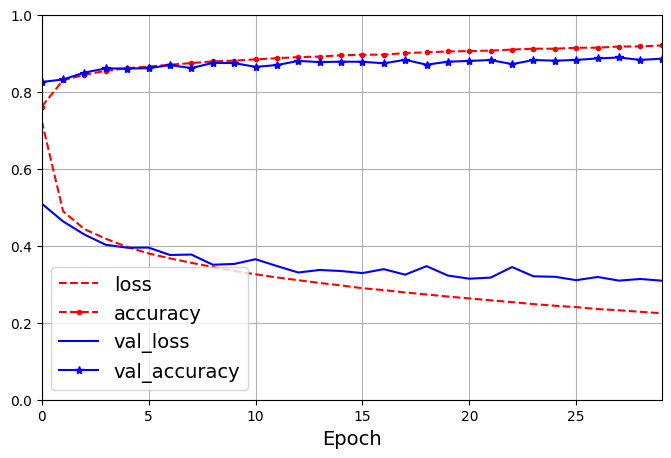

In [11]:
print(history.params)

import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(
    figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",
    style=["r--", "r--.", "b-", "b-*"])
plt.legend(loc="lower left")  # extra code
plt.show()

In [12]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 4ms/step - loss: 0.3227 - accuracy: 0.8834


[0.32270267605781555, 0.883400022983551]

### Using the model to make predictions

In [13]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

X_new = X_test[:3]
y_proba = model.predict(X_new)
print(y_proba.round(2))

y_pred = y_proba.argmax(axis=-1)
print(y_pred)

np.array(class_names)[y_pred]

y_new = y_test[:3]
print(y_new)


1/1 [==============================] - 0s 353ms/step
[[0.   0.   0.   0.   0.   0.01 0.   0.04 0.   0.96]
 [0.   0.   1.   0.   0.   0.   0.   0.   0.   0.  ]
 [0.   1.   0.   0.   0.   0.   0.   0.   0.   0.  ]]
[9 2 1]
[9 2 1]


## Building a Regression MLP Using the Sequential API
we’re using a `Normalization layer` as the
first layer: it does the same thing as Scikit-Learn’s StandardScaler, but
it must be fitted to the training data using its `adapt() method` before you
call the model’s `fit() method`.

In [14]:
housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(
    housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(
    X_train_full, y_train_full, random_state=42)

tf.random.set_seed(42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)
])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss='mse', optimizer=optimizer, metrics=['RootMeanSquaredError'])
norm_layer.adapt(X_train)
model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 6ms/step - loss: 0.8428 - root_mean_squared_error: 0.9180 - val_loss: 0.6089 - val_root_mean_squared_error: 0.7803
Epoch 2/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3838 - root_mean_squared_error: 0.6195 - val_loss: 1.6744 - val_root_mean_squared_error: 1.2940
Epoch 3/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3671 - root_mean_squared_error: 0.6059 - val_loss: 0.6570 - val_root_mean_squared_error: 0.8105
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3494 - root_mean_squared_error: 0.5911 - val_loss: 1.6411 - val_root_mean_squared_error: 1.2811
Epoch 5/20
363/363 [==============================] - 3s 7ms/step - loss: 0.3385 - root_mean_squared_error: 0.5818 - val_loss: 2.3681 - val_root_mean_squared_error: 1.5389
Epoch 6/20
363/363 [==============================] - 3s 8ms/step - loss: 0.3431 - root_mean_squared_error: 0.5858 - val_loss: 0.3947 - val_

In [15]:
print(rmse_test)
print(y_pred)

0.5333039164543152
[[0.48236302]
 [1.1459419 ]
 [4.9248605 ]]


## Building Complex Models Using the Functional API

In [16]:
# extra code – reset the name counters and make the code reproducible
tf.keras.backend.clear_session()
tf.random.set_seed(42)

# normalization_layer = tf.keras.layers.Normalization()
# hidden_layer1 = tf.keras.layers.Dense(30, activation="relu")
# hidden_layer2 = tf.keras.layers.Dense(30, activation="relu")
# concat_layer = tf.keras.layers.Concatenate()
# output_layer = tf.keras.layers.Dense(1)

# input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
# normalized = normalization_layer(input_)
# hidden1 = hidden_layer1(normalized)
# hidden2 = hidden_layer2(hidden1)
# concat = concat_layer([input_, hidden2])
# output = output_layer(concat)

# model = tf.keras.Model(inputs=[input_], outputs=[output])

normalization_layer = tf.keras.layers.Normalization()
input_ = tf.keras.layers.Input(shape=X_train.shape[1:])
normalized = normalization_layer(input_)
hidden1 = tf.keras.layers.Dense(30, activation='relu') (normalized)
hidden2 = tf.keras.layers.Dense(30, activation='relu') (hidden1)
concat = tf.keras.layers.concatenate([input_, hidden2])
output = tf.keras.layers.Dense(1) (concat)

model = tf.keras.Model(inputs=[input_], outputs=[output])

model.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 normalization (Normalization)  (None, 8)            17          ['input_1[0][0]']                
                                                                                                  
 dense (Dense)                  (None, 30)           270         ['normalization[0][0]']          
                                                                                                  
 dense_1 (Dense)                (None, 30)           930         ['dense[0][0]']                  
                                                                                              

In [17]:
optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(optimizer=optimizer, loss='mse', metrics='RootMeanSquaredError')
normalization_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 83592.1250 - root_mean_squared_error: 289.1230 - val_loss: 33864.4766 - val_root_mean_squared_error: 184.0230
Epoch 2/20
363/363 [==============================] - 3s 8ms/step - loss: 1792.4393 - root_mean_squared_error: 42.3372 - val_loss: 23233.6270 - val_root_mean_squared_error: 152.4258
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 514.9739 - root_mean_squared_error: 22.6930 - val_loss: 14649.7236 - val_root_mean_squared_error: 121.0360
Epoch 4/20
363/363 [==============================] - 2s 5ms/step - loss: 232.6661 - root_mean_squared_error: 15.2534 - val_loss: 8693.0186 - val_root_mean_squared_error: 93.2364
Epoch 5/20
363/363 [==============================] - 2s 6ms/step - loss: 134.9413 - root_mean_squared_error: 11.6164 - val_loss: 5509.5273 - val_root_mean_squared_error: 74.2262
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 80.3776 - root_mean_s

In [18]:
tf.random.set_seed(42)  # extra code

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
model = tf.keras.Model(inputs=[input_wide, input_deep], outputs=[output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss="mse", optimizer=optimizer, metrics=["RootMeanSquaredError"])

X_train_wide, X_train_deep = X_train[:, :5], X_train[:, 2:]
X_valid_wide, X_valid_deep = X_valid[:, :5], X_valid[:, 2:]
X_test_wide, X_test_deep = X_test[:, :5], X_test[:, 2:]
X_new_wide, X_new_deep = X_test_wide[:3], X_test_deep[:3]

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit((X_train_wide, X_train_deep), y_train, epochs=20,
                    validation_data=((X_valid_wide, X_valid_deep), y_valid))
mse_test = model.evaluate((X_test_wide, X_test_deep), y_test)
y_pred = model.predict((X_new_wide, X_new_deep))

Epoch 1/20
363/363 [==============================] - 4s 7ms/step - loss: 1.5623 - root_mean_squared_error: 1.2499 - val_loss: 0.6583 - val_root_mean_squared_error: 0.8113
Epoch 2/20
363/363 [==============================] - 2s 6ms/step - loss: 0.5645 - root_mean_squared_error: 0.7513 - val_loss: 1.2844 - val_root_mean_squared_error: 1.1333
Epoch 3/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4753 - root_mean_squared_error: 0.6894 - val_loss: 0.4516 - val_root_mean_squared_error: 0.6720
Epoch 4/20
363/363 [==============================] - 2s 6ms/step - loss: 0.4266 - root_mean_squared_error: 0.6532 - val_loss: 0.5466 - val_root_mean_squared_error: 0.7393
Epoch 5/20
363/363 [==============================] - 1s 4ms/step - loss: 0.4046 - root_mean_squared_error: 0.6361 - val_loss: 1.1887 - val_root_mean_squared_error: 1.0903
Epoch 6/20
363/363 [==============================] - 2s 6ms/step - loss: 0.3907 - root_mean_squared_error: 0.6251 - val_loss: 1.6901 - val_

In [19]:
tf.keras.backend.clear_session()
tf.random.set_seed(42)

input_wide = tf.keras.layers.Input(shape=[5])  # features 0 to 4
input_deep = tf.keras.layers.Input(shape=[6])  # features 2 to 7
norm_layer_wide = tf.keras.layers.Normalization()
norm_layer_deep = tf.keras.layers.Normalization()
norm_wide = norm_layer_wide(input_wide)
norm_deep = norm_layer_deep(input_deep)
hidden1 = tf.keras.layers.Dense(30, activation="relu")(norm_deep)
hidden2 = tf.keras.layers.Dense(30, activation="relu")(hidden1)
concat = tf.keras.layers.concatenate([norm_wide, hidden2])
output = tf.keras.layers.Dense(1)(concat)
aux_output = tf.keras.layers.Dense(1)(hidden2)
model = tf.keras.Model(inputs=[input_wide, input_deep],
                       outputs=[output, aux_output])

optimizer = tf.keras.optimizers.Adam(learning_rate=1e-3)
model.compile(loss=("mse", "mse"), loss_weights=(0.9, 0.1), optimizer=optimizer,
              metrics=["RootMeanSquaredError"])

norm_layer_wide.adapt(X_train_wide)
norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=20,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid))
)

Epoch 1/20
363/363 [==============================] - 5s 8ms/step - loss: 1.3557 - dense_2_loss: 1.2931 - dense_3_loss: 1.9190 - dense_2_root_mean_squared_error: 1.1371 - dense_3_root_mean_squared_error: 1.3853 - val_loss: 0.6610 - val_dense_2_loss: 0.5742 - val_dense_3_loss: 1.4416 - val_dense_2_root_mean_squared_error: 0.7578 - val_dense_3_root_mean_squared_error: 1.2007
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.5184 - dense_2_loss: 0.4923 - dense_3_loss: 0.7527 - dense_2_root_mean_squared_error: 0.7017 - dense_3_root_mean_squared_error: 0.8676 - val_loss: 0.6083 - val_dense_2_loss: 0.6036 - val_dense_3_loss: 0.6501 - val_dense_2_root_mean_squared_error: 0.7769 - val_dense_3_root_mean_squared_error: 0.8063
Epoch 3/20
363/363 [==============================] - 2s 7ms/step - loss: 0.4510 - dense_2_loss: 0.4338 - dense_3_loss: 0.6061 - dense_2_root_mean_squared_error: 0.6586 - dense_3_root_mean_squared_error: 0.7785 - val_loss: 0.4542 - val_dense_2_loss

When you evaluate the model, Keras returns the weighted sum of the
losses, as well as all the individual losses and metrics

In [20]:
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results

162/162 [==============================] - 1s 4ms/step - loss: 0.3342 - dense_2_loss: 0.3276 - dense_3_loss: 0.3933 - dense_2_root_mean_squared_error: 0.5724 - dense_3_root_mean_squared_error: 0.6272


In [21]:
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

1/1 [==============================] - 0s 287ms/step


## Using the Subclassing API to Build Dynamic Models

In [27]:
class wideAndDeepModel(tf.keras.Model):
    def __init__(self, units=30, activation='relu', **kwargs):
        super().__init__(**kwargs) # needed to support naming the model
        self.norm_layer_wide = tf.keras.layers.Normalization()
        self.norm_layer_deep = tf.keras.layers.Normalization()
        self.hidden1 = tf.keras.layers.Dense(units, activation=activation)
        self.hidden2 = tf.keras.layers.Dense(units, activation=activation)
        self.main_output = tf.keras.layers.Dense(1)
        self.aux_output = tf.keras.layers.Dense(1)


    def call(self, inputs):
        input_wide, input_deep = inputs
        norm_wide = self.norm_layer_wide(input_wide)
        norm_deep = self.norm_layer_deep(input_deep)
        hidden1 = self.hidden1(norm_deep)
        hidden2 = self.hidden2(hidden1)
        concat = tf.keras.layers.concatenate([norm_wide, hidden2])
        output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return output, aux_output


tf.random.set_seed(42)
model = wideAndDeepModel(30 , activation='relu', name='my_cool_model')

In [28]:
model.compile(loss='mse', loss_weights=[.9, .1], optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=['RootMeanSquaredError'])
model.norm_layer_wide.adapt(X_train_wide)
model.norm_layer_deep.adapt(X_train_deep)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)))
eval_results = model.evaluate((X_test_wide, X_test_deep), (y_test, y_test))
weighted_sum_of_losses, main_loss, aux_loss, main_rmse, aux_rmse = eval_results
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))


Epoch 1/10
363/363 [==============================] - 3s 5ms/step - loss: 1.5310 - output_1_loss: 1.4715 - output_2_loss: 2.0669 - output_1_root_mean_squared_error: 1.2130 - output_2_root_mean_squared_error: 1.4377 - val_loss: 1.5722 - val_output_1_loss: 1.2918 - val_output_2_loss: 4.0960 - val_output_1_root_mean_squared_error: 1.1366 - val_output_2_root_mean_squared_error: 2.0239
Epoch 2/10
363/363 [==============================] - 2s 6ms/step - loss: 0.5741 - output_1_loss: 0.5501 - output_2_loss: 0.7899 - output_1_root_mean_squared_error: 0.7417 - output_2_root_mean_squared_error: 0.8888 - val_loss: 0.6589 - val_output_1_loss: 0.5244 - val_output_2_loss: 1.8692 - val_output_1_root_mean_squared_error: 0.7241 - val_output_2_root_mean_squared_error: 1.3672
Epoch 3/10
363/363 [==============================] - 1s 4ms/step - loss: 0.4719 - output_1_loss: 0.4579 - output_2_loss: 0.5985 - output_1_root_mean_squared_error: 0.6767 - output_2_root_mean_squared_error: 0.7736 - val_loss: 0.539

## Saving and Restoring a Model

In [30]:
# extra code – delete the directory, in case it already exists

import shutil

shutil.rmtree("my_keras_model", ignore_errors=True)


model.save("my_keras_model")


from pathlib import Path

# extra code – show the contents of the my_keras_model/ directory
for path in sorted(Path("my_keras_model").glob("**/*")):
    print(path)

model = tf.keras.models.load_model("my_keras_model")
y_pred_main, y_pred_aux = model.predict((X_new_wide, X_new_deep))

model.save_weights("my_weights")

model.load_weights("my_weights")

# extra code – show the list of my_weights.* files
for path in sorted(Path().glob("my_weights.*")):
    print(path)

INFO:tensorflow:Assets written to: my_keras_model\assets
my_keras_model\assets
my_keras_model\keras_metadata.pb
my_keras_model\saved_model.pb
my_keras_model\variables
my_keras_model\variables\variables.data-00000-of-00001
my_keras_model\variables\variables.index
1/1 [==============================] - 0s 328ms/step
my_weights.data-00000-of-00001
my_weights.index


## Using Callbacks

In [31]:
shutil.rmtree("my_checkpoints", ignore_errors=True)  # extra code

In [32]:
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint('my_checkpoints', save_weights_only=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb])

Epoch 1/10
363/363 [==============================] - 4s 6ms/step - loss: 0.3652 - output_1_loss: 0.3555 - output_2_loss: 0.4526 - output_1_root_mean_squared_error: 0.5962 - output_2_root_mean_squared_error: 0.6728 - val_loss: 0.6096 - val_output_1_loss: 0.6019 - val_output_2_loss: 0.6791 - val_output_1_root_mean_squared_error: 0.7758 - val_output_2_root_mean_squared_error: 0.8241
Epoch 2/10
363/363 [==============================] - 3s 7ms/step - loss: 0.3703 - output_1_loss: 0.3614 - output_2_loss: 0.4502 - output_1_root_mean_squared_error: 0.6011 - output_2_root_mean_squared_error: 0.6710 - val_loss: 0.5310 - val_output_1_loss: 0.5379 - val_output_2_loss: 0.4693 - val_output_1_root_mean_squared_error: 0.7334 - val_output_2_root_mean_squared_error: 0.6851
Epoch 3/10
363/363 [==============================] - 2s 4ms/step - loss: 0.3595 - output_1_loss: 0.3510 - output_2_loss: 0.4357 - output_1_root_mean_squared_error: 0.5925 - output_2_root_mean_squared_error: 0.6601 - val_loss: 1.375

In [33]:
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=100,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[checkpoint_cb, early_stopping_cb])

Epoch 1/100
363/363 [==============================] - 2s 7ms/step - loss: 0.3428 - output_1_loss: 0.3353 - output_2_loss: 0.4108 - output_1_root_mean_squared_error: 0.5790 - output_2_root_mean_squared_error: 0.6409 - val_loss: 1.0504 - val_output_1_loss: 1.0372 - val_output_2_loss: 1.1691 - val_output_1_root_mean_squared_error: 1.0184 - val_output_2_root_mean_squared_error: 1.0813
Epoch 2/100
363/363 [==============================] - 1s 3ms/step - loss: 0.3481 - output_1_loss: 0.3415 - output_2_loss: 0.4078 - output_1_root_mean_squared_error: 0.5844 - output_2_root_mean_squared_error: 0.6386 - val_loss: 0.8522 - val_output_1_loss: 0.8991 - val_output_2_loss: 0.4299 - val_output_1_root_mean_squared_error: 0.9482 - val_output_2_root_mean_squared_error: 0.6557
Epoch 3/100
363/363 [==============================] - 3s 8ms/step - loss: 0.3430 - output_1_loss: 0.3366 - output_2_loss: 0.4011 - output_1_root_mean_squared_error: 0.5801 - output_2_root_mean_squared_error: 0.6333 - val_loss: 1.

In [35]:
class PrintValTrainRatioCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        ratio = logs['val_loss'] / logs['loss']
        print(f"Epoch={epoch} val/train={ratio:.2f}")

In [36]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(
    (X_train_wide, X_train_deep), (y_train, y_train), epochs=10,
    validation_data=((X_valid_wide, X_valid_deep), (y_valid, y_valid)),
    callbacks=[val_train_ratio_cb], verbose=0)

Epoch=0 val/train=1.05
Epoch=1 val/train=1.02
Epoch=2 val/train=1.06
Epoch=3 val/train=1.70
Epoch=4 val/train=1.63
Epoch=5 val/train=1.97
Epoch=6 val/train=3.32
Epoch=7 val/train=1.72
Epoch=8 val/train=1.79
Epoch=9 val/train=0.96


## Using TensorBoard for Visualization

# Fine-Tuning Neural Network Hyperparameters

In [39]:
(X_train_full, y_train_full), (X_test, y_test) = fashion_minst
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

tf.keras.backend.clear_session()
tf.random.set_seed(42)

The first part of the function defines the hyperparameters. For example,
`hp.Int("n_hidden", min_value=0, max_value=8,
default=2)` checks whether a hyperparameter named "n_hidden" is
already present in the HyperParameters object hp, and if so it returns
its value.  
If not, then it registers a new integer hyperparameter named
"n_hidden", whose possible values range from 0 to 8 (inclusive), and it
returns the default value, which is 2 in this case (when default is not set,
then min_value is returned).

In [41]:
import keras_tuner as kt

def build_model(hp):
    n_hidden = hp.Int('n_hidden', min_value=0, max_value=8, default=2)
    n_neurons = hp.Int('n_nuerons', min_value=16, max_value=256)
    learning_rate = hp.Float('learning_rate', min_value=1e-4, max_value=1e-2, sampling='log')
    optimizer = hp.Choice('optimizer', values=['sgd', 'adam'])
    if optimizer == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=learning_rate)
    else:
        optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)

    model = tf.keras.Sequential()
    model.add(tf.keras.layers.Flatten())
    for _ in range(n_hidden):
        model.add(tf.keras.layers.Dense(n_neurons, activation="relu"))
    model.add(tf.keras.layers.Dense(10, activation="softmax"))
    model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
                  metrics=["accuracy"])
    return model

In [42]:
random_search_tuner = kt.RandomSearch(build_model, objective='val_accuracy', max_trials=5, overwrite=True,
    directory="my_fashion_mnist", project_name="my_rnd_search", seed=42)
random_search_tuner.search(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Trial 5 Complete [00h 01m 30s]
val_accuracy: 0.8754000067710876

Best val_accuracy So Far: 0.8754000067710876
Total elapsed time: 00h 08m 02s
INFO:tensorflow:Oracle triggered exit


In [45]:
top3_models = random_search_tuner.get_best_models(num_models=3)
best_model = top3_models[0]

In [46]:
best_trial = random_search_tuner.oracle.get_best_trials(num_trials=1)[0]
best_trial.summary()

Trial summary
Hyperparameters:
n_hidden: 5
n_nuerons: 70
learning_rate: 0.00041268008323824807
optimizer: adam
Score: 0.8754000067710876


In [47]:
best_trial.metrics.get_last_value("val_accuracy")

0.8754000067710876

In [48]:
best_model.fit(X_train_full, y_train_full, epochs=10)
test_loss, test_accuracy = best_model.evaluate(X_test, y_test)

Epoch 1/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3212 - accuracy: 0.8829
Epoch 2/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.3076 - accuracy: 0.8871
Epoch 3/10
1875/1875 [==============================] - 10s 5ms/step - loss: 0.3012 - accuracy: 0.8896
Epoch 4/10
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2896 - accuracy: 0.8931
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2846 - accuracy: 0.8953
Epoch 6/10
1875/1875 [==============================] - 11s 6ms/step - loss: 0.2751 - accuracy: 0.8982
Epoch 7/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2704 - accuracy: 0.8996
Epoch 8/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.2644 - accuracy: 0.9021
Epoch 9/10
1875/1875 [==============================] - 8s 4ms/step - loss: 0.2574 - accuracy: 0.9040
Epoch 10/10
313/313 [==============================] - 1s 2ms/step - loss: 0.36

To fine-tune data preprocessing
hyperparameters, or
`model.fit()`
arguments, such as the batch size.  
you must subclass the
`kt.HyperModel`
class and define two methods,
`build()`
and
`fit()`.  
The
`build()`
method does the exact same thing as the
`build_model()`
function.  
he
`fit()`
method may use hyperparameters to decide how to preprocess the data,
tweak the batch size, and more

In [49]:
class MyClassificationHyperModel(kt.HyperModel):
    def build(self, hp):
        return build_model(hp)

    def fit(self, hp,  model, X, y, **kwargs):
        if hp.Boolean('normalize'):
            X = tf.keras.layers.Normalization()(X)
        return model.fit(X, y, **kwargs)

In [50]:
hyperband_tuner = kt.Hyperband(MyClassificationHyperModel(), objective='val_accuracy', seed=42,
            max_epochs=10, factor=3, hyperband_iterations=2,
    overwrite=True, directory="my_fashion_mnist", project_name="hyperband")

In [51]:
root_logdir = Path(hyperband_tuner.project_dir) / "tensorboard"
tensorboard_cb = tf.keras.callbacks.TensorBoard(root_logdir)
early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=2)
hyperband_tuner.search(X_train, y_train, epochs=10,
                       validation_data=(X_valid, y_valid),
                       callbacks=[early_stopping_cb, tensorboard_cb])

Trial 60 Complete [00h 01m 23s]
val_accuracy: 0.8529999852180481

Best val_accuracy So Far: 0.8708000183105469
Total elapsed time: 00h 44m 59s
INFO:tensorflow:Oracle triggered exit


In [52]:
bayesian_opt_tuner = kt.BayesianOptimization(
    MyClassificationHyperModel(), objective="val_accuracy", seed=42,
    max_trials=10, alpha=1e-4, beta=2.6,
    overwrite=True, directory="my_fashion_mnist", project_name="bayesian_opt")
bayesian_opt_tuner.search(X_train, y_train, epochs=10,
                          validation_data=(X_valid, y_valid),
                          callbacks=[early_stopping_cb])

Trial 10 Complete [00h 00m 33s]
val_accuracy: 0.8076000213623047

Best val_accuracy So Far: 0.8628000020980835
Total elapsed time: 00h 13m 31s
INFO:tensorflow:Oracle triggered exit
